# Data Assignment 5 (6 Points)

MGOC15 Winter 2024 - Introductory Business Data Analytics

**Topics Tested:** Outliers, Data Correlations, Linear Regressions <br>
**Submission Format**: Please include your name in the assignment submission.
You may work in teams of two (or individually) but you must each submit your assignment separately and also mention your partner's name so that your work does not seem plagiarized.


### Housing Prices

Accurately predicting housing prices is a billion dollar business, quite literally[1]. You have been given the sale prices of different homes in a small town in Iowa, USA. Our *final* objective is to use linear regression to predict the house prices as accurately as possible. We also need to understand what drives housing prices and how potential home owners value different features of a house.

**Target/Outcome Field**: *SalePrice* <br>
See the attached file "Data Description.txt" for a guide to the other variables.

<i> This assignment is worth 6 points</i>

[1] https://www.kaggle.com/c/zillow-prize-1

### Import all of the Modules used in Lecture 9

Note that we need several additional modules for Linear regression. Please import the modules from Lecture 9. 

In [1]:
#Import Modules Here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

### Read the File and Inspect Columns

In [2]:
df_housing = pd.read_csv('Housing_prices.csv')
df_housing.head()

,Id,Neighborhood,Total_sqr_footage,OverallQual,OverallCond,YearBuilt,GrLivArea,GarageCars,LotFrontage,PoolArea,SalePrice,Street,BldgType,FullBath,HalfBath,BsmtFullBath
0,1,CollgCr,2566,7,5,2003,1710,2,65.0,0,208500,Pave,1Fam,2,1,1
1,2,Veenker,2524,6,8,1976,1262,2,80.0,0,181500,Pave,1Fam,2,0,0
2,3,CollgCr,2706,7,5,2001,1786,2,68.0,0,223500,Pave,1Fam,2,1,1
3,4,Crawfor,2473,7,5,1915,1717,3,60.0,0,140000,Pave,1Fam,1,0,1
4,5,NoRidge,3343,8,5,2000,2198,3,84.0,0,250000,Pave,1Fam,2,1,1


### Q1: Data Inconsistencies and Outliers [1 points]

**Part a**: Remove all outliers in the following columns only: 

    - Total_sqr_footage
    - OverallQual
    - GrLivArea
    - SalePrice

**Part b**: (Explanation only) You have been asked to find the average sale price of homes in your neighbourhood within the last 5 years, but there is one property that is a clear outlier as its sale price was considerably higher than the rest. Should you or should you not remove this property from the dataset before answering the question? Explain why.


**Note:**

    a. There is no need to remove outliers at any point after this. <br/>
    b. All subsequent analysis must be on the updated dataframe (without outliers).

,Id,Neighborhood,Total_sqr_footage,OverallQual,OverallCond,YearBuilt,GrLivArea,GarageCars,LotFrontage,PoolArea,SalePrice,Street,BldgType,FullBath,HalfBath,BsmtFullBath
0,1,CollgCr,2566,7,5,2003,1710,2,65.0,0,208500,Pave,1Fam,2,1,1
1,2,Veenker,2524,6,8,1976,1262,2,80.0,0,181500,Pave,1Fam,2,0,0
2,3,CollgCr,2706,7,5,2001,1786,2,68.0,0,223500,Pave,1Fam,2,1,1
3,4,Crawfor,2473,7,5,1915,1717,3,60.0,0,140000,Pave,1Fam,1,0,1
4,5,NoRidge,3343,8,5,2000,2198,3,84.0,0,250000,Pave,1Fam,2,1,1


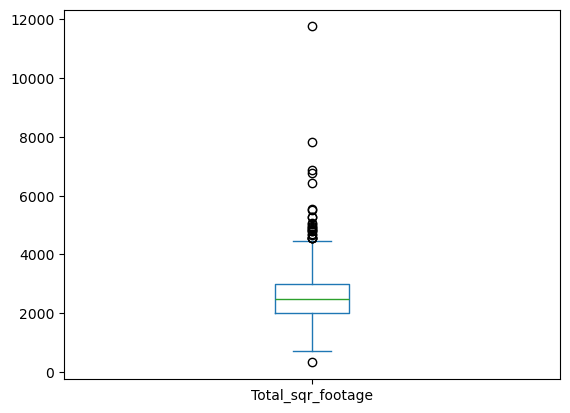

In [3]:
df_housing["Total_sqr_footage"].plot.box()
threshold=df_housing["Total_sqr_footage"].mean()+4*df_housing["Total_sqr_footage"].std()
df_housing=df_housing[df_housing["Total_sqr_footage"]<threshold]
df_housing.head()

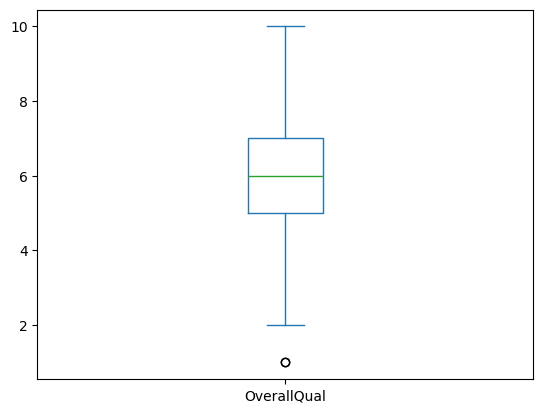

In [4]:
df_housing["OverallQual"].plot.box()
threshold=df_housing["OverallQual"].mean()-4*df_housing["OverallQual"].std()
df_housing=df_housing[df_housing["OverallQual"]>threshold]


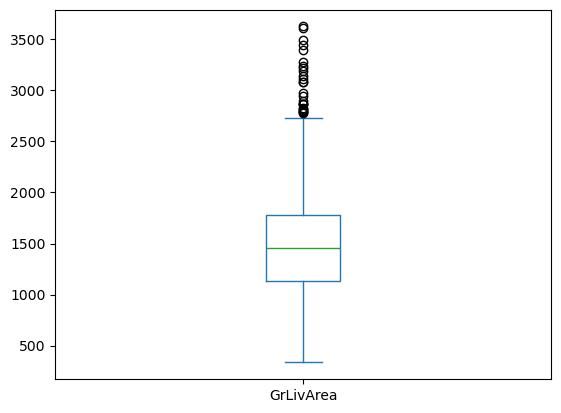

In [5]:
df_housing["GrLivArea"].plot.box()
threshold=df_housing["GrLivArea"].mean()+4*df_housing["GrLivArea"].std()
df_housing=df_housing[df_housing["GrLivArea"]<threshold]

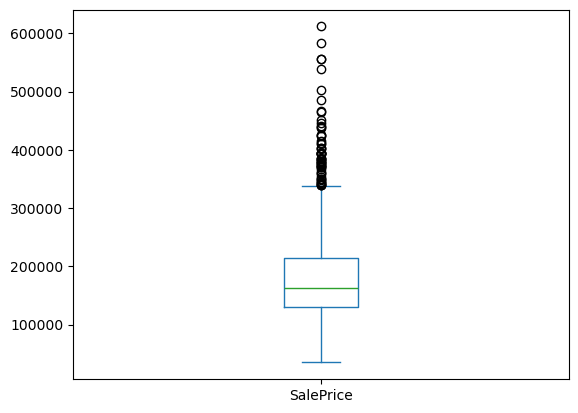

In [6]:
df_housing["SalePrice"].plot.box()
threshold=df_housing["SalePrice"].mean()+4*df_housing["SalePrice"].std()
df_housing=df_housing[df_housing["SalePrice"]<threshold]

**Explanations for Part b**

Before deleting the data, it is important to consider the reasons for the outliers and the actual circumstances. For example, is the area a high middle class dominated luxury neighborhood. If it is, then it does not meet the general neighborhood criteria and the data should be deleted. Failure to do so will jeopardize the integrity of the average data.

### Q2: Correlations [1.5 points]

Before we start predicting home prices, it's important that we understand how American homes have changed over the years and how these changes drive prices. With this in mind, use both statistical methods (correlational coefficients) and visualizations to answer the following questions.

**Part a**: Since American families are shrinking [1], it seems likely that consumer demand for larger homes/properties is also weaker. With this in mind, support or refute the following hypothesis:

    "The willingness to pay for larger homes increases only weakly with the size of the property"

[1] - https://www.pewresearch.org/social-trends/2015/12/17/1-the-american-family-today/

    Hint: Your answer must clearly discuss the validity/reliability of the statistical correlational measure you choose.

<Axes: xlabel='Total_sqr_footage', ylabel='SalePrice'>

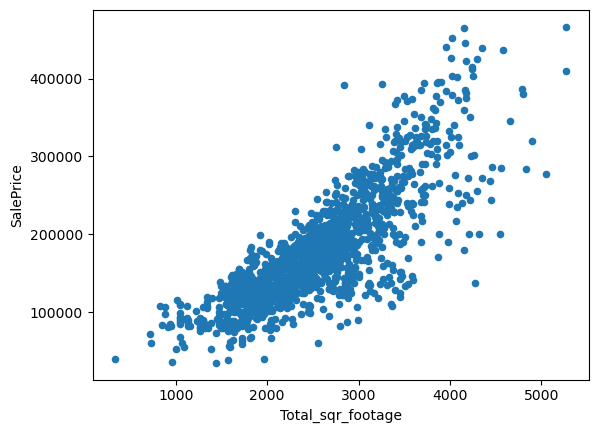

In [7]:
df_housing.plot.scatter(x="Total_sqr_footage", y="SalePrice")

Given that 1) we have removed the outliers, therefore, the graph does not show any outliers; 2)There is a linear relationship between the two variables; 3) data in the graph is continuous; 4) the graph shows homoskedasticity, 
the graph indicate a positive correlation between the total square footage and sale price, and we could use pearson's correlation to calculate this coefficient reliablely.

In [8]:
col_names=["Total_sqr_footage", "SalePrice"]
df_housing[col_names].corr()

,Total_sqr_footage,SalePrice
Total_sqr_footage,1.000000,0.816542
SalePrice,0.816542,1.000000


The correlation coefficient of 0.82 shows that when total square footage inceases, the sale price increases significantly. Given that there is a strong correlation between the two variables, the hypothesis: "The willingness to pay for larger homes increases only weakly with the size of the property" is incorrect.

**Part b**: Investigate the following hypothesis:

    "Higher quality properties are significantly more valuable than low-quality properties"
    
You may follow the steps outlined below:

1. In this scenario, is it reasonable to use a scatter plot to study the correlation between the relevant variables? Why/Why not?
2. Based on your answer to 1, comment on the reliability of Pearson's coefficient?
3. In lieu of a scatter plot, compare the SalePrice of high quality and low quality homes using a box plot. You may assume that any house whose quality is at or above the median is high quality (and vice-versa for low quality).
4. When you compare box plots, your y-axes must have the same ranges.
5. Use a suitable correlational coefficient to quantify the relationship.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

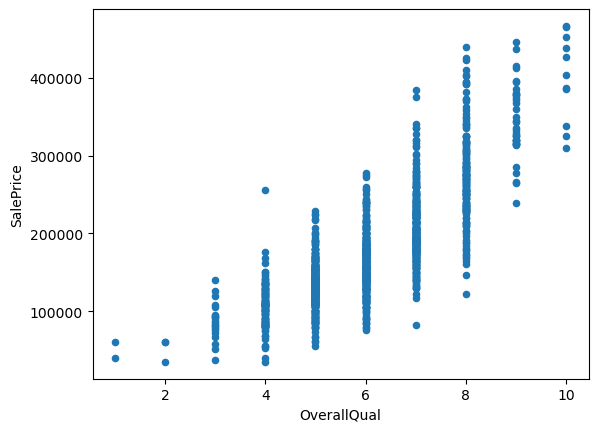

In [9]:
df_housing.plot.scatter(x="OverallQual", y="SalePrice")

1.In this dataset, although "OverallQual" takes numerical values, it represents ordered categories, and therefore it is a categorical column with an ordinal ranking. In this case,there is no linear relationship between the variables, and thus we cannot use scatter plot.

2.Pearson is only accurate when certain cretirions are met. However, in this case, although there is no outliers,the scatter plot is non-linear, discontinued, and does not present homoscedasticity, therefore, Pearson is not suitable for this analysis.

(0.0, 500000.0)

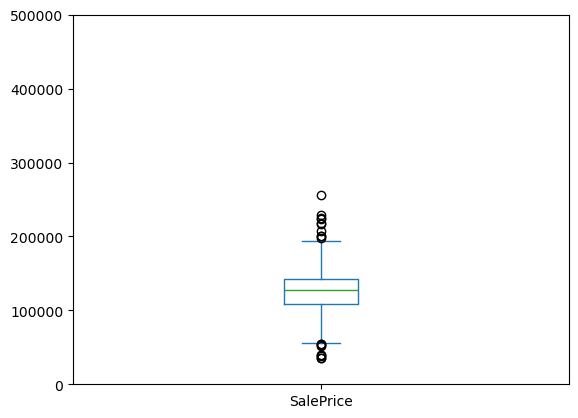

In [10]:
threshold=df_housing["OverallQual"].median()
dfLowQual=df_housing[df_housing["OverallQual"]<threshold]
dfLowQual["SalePrice"].plot.box()
plt.ylim([0,500000])


(0.0, 500000.0)

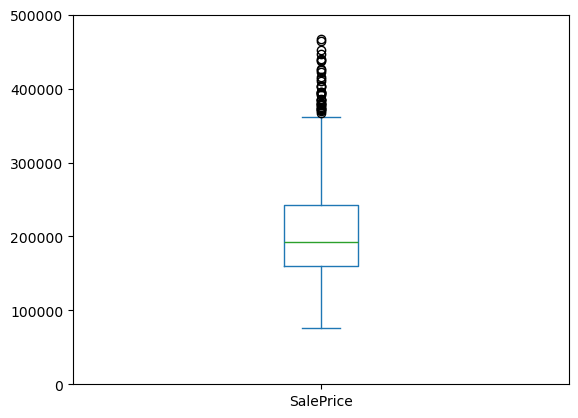

In [11]:
dfHighQual=df_housing[df_housing['OverallQual']>=threshold]
dfHighQual["SalePrice"].plot.box()
plt.ylim([0,500000])

In [12]:
cols_list=["OverallQual","SalePrice"]
df_housing[cols_list].corr("kendall")

,OverallQual,SalePrice
OverallQual,1.000000,0.665947
SalePrice,0.665947,1.000000


The hypothesis,"Higher quality properties are significantly more valuable than low-quality properties", seems to be true based on the correlation between these two variables.

### Q3: Feature Engineering [1 point]

Feature engineering is the process of creating new columns in a dataset by modifying or transforming existing data. These new columns are more amenable to linear regression. Based on this, let's answer the following question.

There are three categorical columns in our dataset - *Neighborhood, BldgType, Street*. We will ignore *Street* (you can see why once you do a value counts) and *BldgType* (as the correlation is not so strong). Let us focus on the Neighborhood  column.

**Part a**: Do you think the Neighborhood of a property will be a good predictor of Price, i.e., is the correlation between two these variables strong?

    Hint: Use a groupby to answer the question. If possible, comment on whether one can find correlational coefficients for a non-numeric categorical column.

**Part b**: The ideal method to incorporate categorical columns with so many categories is via the introduction of dummy variables, i.e., 0/1 variables for each category. However, in this problem that can be very tedious. 

Since there are too many neighborhoods, let us adopt the following approach. Our goal is to predict the SalePrice - therefore, identify the two most and two least expensive neighborhoods. Include four binary (0/1) columns that correspond to each of these four neighborhoods only, i.e., your binary column must equal one for the appropriate neighborhood and equal zero otherwise. 


In [13]:
df_housing.groupby('Neighborhood')['SalePrice'].mean().sort_values()


Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
OldTown    123598.729730
BrkSide    124834.051724
Edwards    127318.571429
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    280275.318182
NoRidge    302489.405405
NridgHt    302989.698630
Name: SalePrice, dtype: float64

we can't calculate a correlation coefficient directly for a categorical variable against a continuous variable. But from the difference in sale prices across neighborhoods, we can tell that there are wide ranges in these values suggesting a strong influence of neighborhoods on prices.

In [14]:
df_housing['Neighborhood_cheapest1'] = 0
df_housing.loc[df_housing['Neighborhood'] == 'MeadowV', 'Neighborhood_cheapest1'] = 1
df_housing['Neighborhood_cheapest2'] = 0
df_housing.loc[df_housing['Neighborhood'] == 'IDOTRR', 'Neighborhood_cheapest2'] = 1

df_housing['Neighborhood_expensive1'] = 0
df_housing.loc[df_housing['Neighborhood'] == 'NoRidge', 'Neighborhood_expensive1'] = 1
df_housing['Neighborhood_expensive2'] = 0
df_housing.loc[df_housing['Neighborhood'] == 'NridgHt', 'Neighborhood_expensive2'] = 1

df_housing.head()

,Id,Neighborhood,Total_sqr_footage,OverallQual,OverallCond,YearBuilt,GrLivArea,GarageCars,LotFrontage,PoolArea,SalePrice,Street,BldgType,FullBath,HalfBath,BsmtFullBath,Neighborhood_cheapest1,Neighborhood_cheapest2,Neighborhood_expensive1,Neighborhood_expensive2
0,1,CollgCr,2566,7,5,2003,1710,2,65.0,0,208500,Pave,1Fam,2,1,1,0,0,0,0
1,2,Veenker,2524,6,8,1976,1262,2,80.0,0,181500,Pave,1Fam,2,0,0,0,0,0,0
2,3,CollgCr,2706,7,5,2001,1786,2,68.0,0,223500,Pave,1Fam,2,1,1,0,0,0,0
3,4,Crawfor,2473,7,5,1915,1717,3,60.0,0,140000,Pave,1Fam,1,0,1,0,0,0,0
4,5,NoRidge,3343,8,5,2000,2198,3,84.0,0,250000,Pave,1Fam,2,1,1,0,0,1,0


### Q4:Regressions [1.5 points]

Run a linear regression to predict *SalePrice* and report both the RMSE and $R^2$ errors. You may use all the $X$ columns in your dataset to make the prediction or you may simply choose some subset of the columns that are strongly correlated with the outcome variable but also diverse (it's your choice). Your $R^2$ must be greater than 0.7.

Once you've run the regression, answer the following questions using at most two sentences.

**Part a**: Based on your analysis, what do you think are the most informative features (columns), i.e., what are potential buyers most influenced by when they buy a house? Use two different approaches to answer this question.

    Hint: If your code results in an error, it means you've forgotten to remove missing data.

**Part b**: Answer true or false for the following statements and provide one line of explanation only (no more).
1. Statement 1: If you have two different datasets and linear models for each of them, then the model with the smaller RMSE is always the better model (i.e., if fits the data better).
2. Statement 2: If we compare two different models for the same dataset, the model with the higher R-squared is always the better model in terms of its prediction value or how it fits the data.

    Hint: If you use ChatGPT to answer Part b, your answer will not be fully correct :) 

In [15]:
df_housing.isnull().sum()

Id                           0
Neighborhood                 0
Total_sqr_footage            0
OverallQual                  0
OverallCond                  0
YearBuilt                    0
GrLivArea                    0
GarageCars                   0
LotFrontage                258
PoolArea                     0
SalePrice                    0
Street                       0
BldgType                     0
FullBath                     0
HalfBath                     0
BsmtFullBath                 0
Neighborhood_cheapest1       0
Neighborhood_cheapest2       0
Neighborhood_expensive1      0
Neighborhood_expensive2      0
dtype: int64

In [16]:
df_housing.corr("kendall",numeric_only="True")

,Id,Total_sqr_footage,OverallQual,OverallCond,YearBuilt,GrLivArea,GarageCars,LotFrontage,PoolArea,SalePrice,FullBath,HalfBath,BsmtFullBath,Neighborhood_cheapest1,Neighborhood_cheapest2,Neighborhood_expensive1,Neighborhood_expensive2
Id,1.000000,-0.005935,-0.021511,0.005713,-0.006632,0.002332,0.011071,-0.024928,0.030508,-0.011263,0.005404,-0.001753,0.001976,0.000540,-0.041744,0.024192,-0.057058
Total_sqr_footage,-0.005935,1.000000,0.513280,-0.161922,0.278961,0.691283,0.459378,0.301570,0.032371,0.635951,0.495170,0.196737,0.127012,-0.104410,-0.133599,0.186126,0.218552
OverallQual,-0.021511,0.513280,1.000000,-0.152032,0.504840,0.453819,0.534637,0.180587,0.024480,0.665947,0.504905,0.259631,0.082148,-0.122950,-0.135318,0.185166,0.286173
OverallCond,0.005713,-0.161922,-0.152032,1.000000,-0.325242,-0.118688,-0.228907,-0.065069,0.006946,-0.103420,-0.243814,-0.064485,-0.043343,0.002173,0.007137,-0.055848,-0.130656
YearBuilt,-0.006632,0.278961,0.504840,-0.325242,1.000000,0.185601,0.491996,0.134287,-0.013020,0.472321,0.437581,0.196676,0.127798,-0.000874,-0.177780,0.085919,0.259597
GrLivArea,0.002332,0.691283,0.453819,-0.118688,0.185601,1.000000,0.394079,0.251431,0.034106,0.537739,0.530618,0.352953,0.001609,-0.085101,-0.103106,0.192790,0.156283
GarageCars,0.011071,0.459378,0.534637,-0.228907,0.491996,0.394079,1.000000,0.269067,0.002900,0.565829,0.477146,0.209924,0.132980,-0.115804,-0.156217,0.183623,0.267722
LotFrontage,-0.024928,0.301570,0.180587,-0.065069,0.134287,0.251431,0.269067,1.000000,0.045599,0.284066,0.167947,0.070004,0.068962,-0.150968,-0.072325,0.119732,0.113802
PoolArea,0.030508,0.032371,0.024480,0.006946,-0.013020,0.034106,0.002900,0.045599,1.000000,0.041711,0.018215,0.003118,0.045005,-0.006425,-0.009546,-0.009546,-0.013583
SalePrice,-0.011263,0.635951,0.665947,-0.103420,0.472321,0.537739,0.565829,0.284066,0.041711,1.000000,0.511228,0.275733,0.183481,-0.121182,-0.167129,0.190231,0.251275


In [17]:
x_cols = ['Total_sqr_footage', 'OverallQual', 'GrLivArea','GarageCars','FullBath']
y_col = ['SalePrice']
dfX = df_housing[x_cols]
dfY = df_housing[y_col]
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.3,random_state=0)
print(len(X_train)/len(dfX),len(X_test)/len(dfX))

0.6996539792387543 0.30034602076124567


In [18]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)

LinearRegression()

In [19]:
linearRegression.intercept_

array([-91734.02039255])

In [20]:
pd.DataFrame(np.transpose(linearRegression.coef_), x_cols, ['Regression Coeffs'])

,Regression Coeffs
Total_sqr_footage,39.726292
OverallQual,21135.342801
GrLivArea,9.223267
GarageCars,17006.098332
FullBath,-2134.372052


In [21]:
std_devs = dfX.std().values
modified_coeffs = linearRegression.coef_ * std_devs
pd.DataFrame(np.transpose(modified_coeffs), dfX.columns, ['Standardized Coefficients'])

,Standardized Coefficients
Total_sqr_footage,28927.522632
OverallQual,28537.041552
GrLivArea,4420.256610
GarageCars,12616.548591
FullBath,-1152.592421


In [22]:
Y_predicted = linearRegression.predict(X_test)
meanSquaredError = metrics.mean_squared_error(Y_test, Y_predicted)
print("Mean Squared Error: ", meanSquaredError)

meanRootError = np.sqrt(meanSquaredError)
print("Root Mean Squared Error: ", meanRootError)

print("Normalized Mean Squared Error:", r2_score(Y_test, Y_predicted))

Mean Squared Error:  753957297.7970289
Root Mean Squared Error:  27458.28286322779
Normalized Mean Squared Error: 0.8492031497422458


Part A: 
Regression coefficient: OverallQual, GarageCars,FullBath
Standardized Coefficients: Total_sqr_footage, OverallQual, GarageCars	

Part B:
Statement1: False, a lower RMSE indicates smaller errors suggesting a good fit to the training data, however, it does not mean it is a good model for prediction because of the risk of overfitting.
Statement2: False, high R-squared can be the result of overfitting or adding more variables, which does not necessarily mean the model has better predictive accuracy.

When you use train_test_split, do not forget to include random_state = 0

### Question 5: Training Test Split [1 points]

In all our experiments so far, we have used a 70:30 split for the training and test data. We need to verify if this 70:30 split is sacred or if other ratios are also okay. To answer this question, run the linear regression in Q4 again with a a) 50:50 split and b) 90:10 split. 

What are the RMSE and R^2 error in both cases. Based on your experiments, can you conclude which of the three (50:50, 70:30, 90:10) is the best ratio for a training-test split. 

**Hint**: You can adjust the ratio by altering the "test_size" parameter in train_test_split. Don't forget to include the random_state=0 part of your code so that I can verify the error. 


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.5,random_state=0)
print(len(X_train)/len(dfX),len(X_test)/len(dfX))
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)
meanRootError = np.sqrt(meanSquaredError)
print("Root Mean Squared Error: ", meanRootError)
Y_predicted = linearRegression.predict(X_test)
print("Normalized Mean Squared Error:", r2_score(Y_test, Y_predicted))

0.4996539792387543 0.5003460207612457
Root Mean Squared Error:  27458.28286322779
Normalized Mean Squared Error: 0.826973517041151


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.1,random_state=0)
print(len(X_train)/len(dfX),len(X_test)/len(dfX))
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)
meanRootError = np.sqrt(meanSquaredError)
print("Root Mean Squared Error: ", meanRootError)
Y_predicted = linearRegression.predict(X_test)
print("Normalized Mean Squared Error:", r2_score(Y_test, Y_predicted))

0.8996539792387543 0.10034602076124567
Root Mean Squared Error:  27458.28286322779
Normalized Mean Squared Error: 0.8674432562860741


It seems like R-squared increases as the size of the training set increases. Nevertheless, because the larger training set can lead to overfitting and results in not being able to generalized to new data, a 70:30 split might still be better, especially for smaller datasets.